[0.0, 0.010101010195648316, 0.020202023230442425, 0.0303030533000921, 0.04040413731324888, 0.05050534624706451, 0.060606796500403674, 0.07070866124184425, 0.08081118174781449, 0.09091467872399013, 0.10101956360041171, 0.11112634978769499, 0.12123566387820539, 0.1313482567721785, 0.1414650147045181, 0.1515869701434344, 0.16171531252725307, 0.17185139880069372, 0.1819967637067734, 0.19215312978533536, 0.20232241702415485, 0.21250675210377057, 0.22270847717278955, 0.2329301580865774, 0.24317459203917277, 0.25344481451612494, 0.2637441054949588, 0.2740759948202899, 0.2844442666824273, 0.29485296313175147, 0.30530638656634596, 0.31580910113736554, 0.32636593302544015, 0.3369819695519779, 0.34766255710143285, 0.3584132978442135, 0.3692400452646748, 0.3801488985142029, 0.3911461956253784, 0.4022385056391426, 0.41343261971233936, 0.4247355412874849, 0.4361544754196917, 0.4476968173669397, 0.4593701405589877, 0.47118218406692014, 0.4831408396994324, 0.4952541388534146, 0.5075302392452349, 0.519

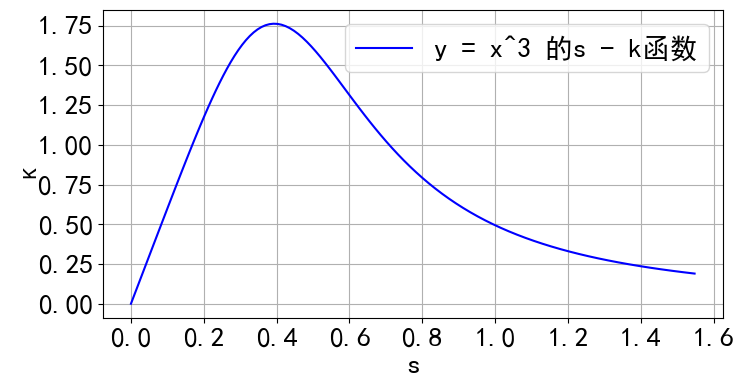

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
# 启用汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 定义函数 y = f(x)
def f(x):
    return x**3

# 定义导数 dy/dx
def df_dx(x):
    return 3 * x**2

# 定义二阶导数 d2y/dx2
def d2f_dx2(x):
    return 6 * x
# 定义曲率函数
def curvature(x):
    return np.abs(d2f_dx2(x)) / (1 + df_dx(x)**2)**1.5

# 定义弧长积分被积函数
def integrand(x):
    return np.sqrt(1 + df_dx(x)**2)

# 计算弧长函数
def arc_length(x):
    s, _ = quad(integrand, 0, x)  # 在区间 [0, x] 上计算弧长
    return s

# 计算曲率函数
x_values = np.linspace(0, 1, 100)
kappa_values = curvature(x_values)

# 计算弧长函数
s_values = [arc_length(x) for x in x_values]
print(s_values, kappa_values)
# 绘制弧长-曲率关系图像
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='y = x^3 的s - k函数', color='blue')
plt.xlabel('s', fontsize=20)
plt.ylabel('κ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()



[0.0, 0.20028742685153805, 0.40894231401016984, 0.6616586570745054, 1.0199349924533787, 1.5478656546836111] [0.0, 1.1745388467905231, 1.7584975113165284, 1.1290015294469615, 0.4731318731686259, 0.18973665961010278]


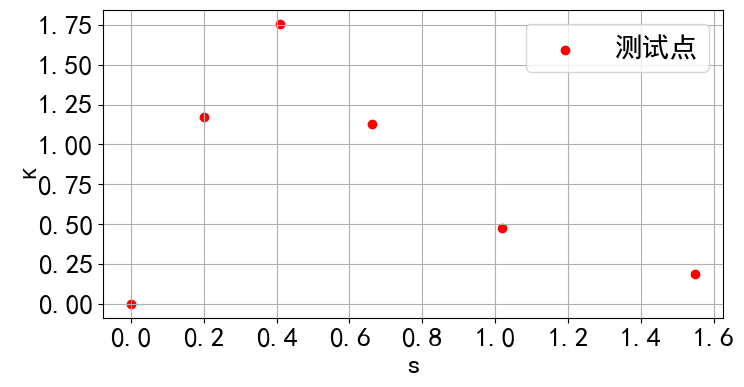

In [20]:
# 从上式中等距抽取 6 个点
test_s = [arc_length(x) for x in np.linspace(0, 1, 6)]
test_kappa = [curvature(x) for x in np.linspace(0, 1, 6)]
print(test_s, test_kappa)
# 绘图
plt.figure(figsize=(8, 4))
plt.scatter(test_s, test_kappa, color='red', label='测试点')
plt.xlabel('s', fontsize=20)
plt.ylabel('κ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


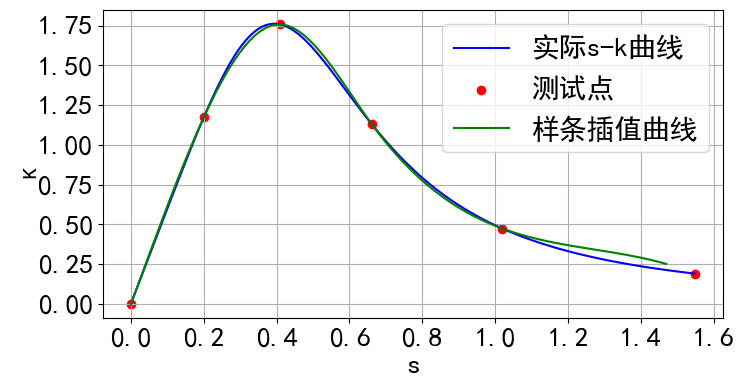

In [21]:
# 采用样条插值法对曲率函数进行插值
from scipy.interpolate import CubicSpline
cs = CubicSpline(test_s, test_kappa)
new_s = np.linspace(0, 1.47, 100)
new_kappa = cs(new_s)
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='实际s-k曲线', color='blue')
plt.scatter(test_s, test_kappa, color='red', label='测试点')
plt.plot(new_s, new_kappa, label='样条插值曲线', color='green')
plt.xlabel('s', fontsize=20)
plt.ylabel('κ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


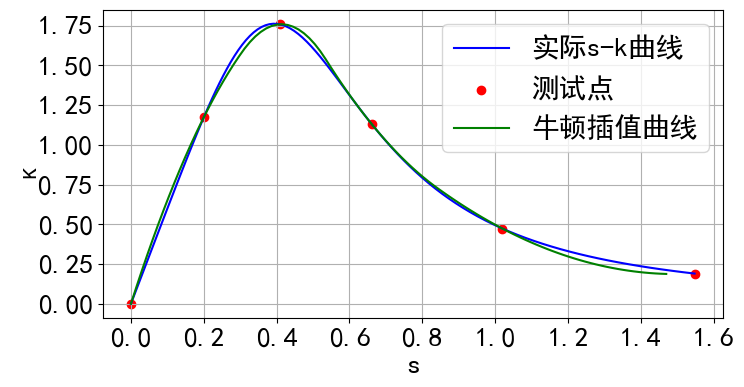

In [22]:
# 多项式插值
from scipy.interpolate import interp1d
f = interp1d(test_s, test_kappa, kind='quadratic')
new_kappa = f(new_s)
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='实际s-k曲线', color='blue')
plt.scatter(test_s, test_kappa, color='red', label='测试点')
plt.plot(new_s, new_kappa, label='牛顿插值曲线', color='green')
plt.xlabel('s', fontsize=20)
plt.ylabel('κ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


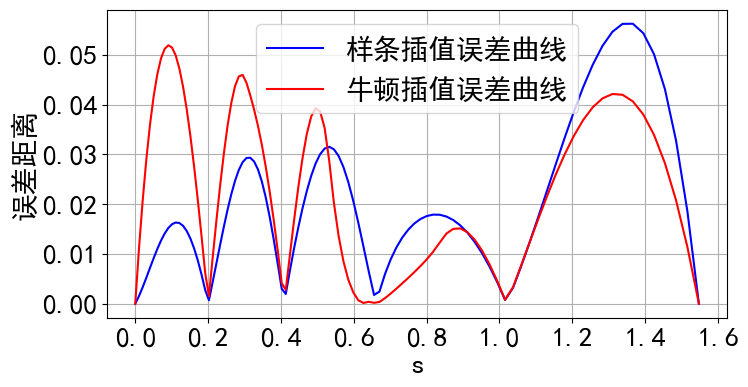

In [23]:
# 计算每个点的误差距离
err1 = np.abs(kappa_values - cs(s_values))
err2 = np.abs(kappa_values - f(s_values))
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, err1, label='样条插值误差曲线', color='blue')
plt.plot(s_values, err2, label='牛顿插值误差曲线', color='red')
plt.xlabel('s',fontsize=20)
plt.ylabel('误差距离',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()



## 从上面两种插值方法的误差对比来看，在弧长为样条插值相对多项式插值更加优秀

## 误差数据表格

In [24]:
# 绘制误差数据表
err1 = np.abs(kappa_values - cs(s_values))
err2 = np.abs(kappa_values - f(s_values))
# err1 的平均绝对误差
mean_err1 = np.mean(err1)
# err2 的平均绝对误差
mean_err2 = np.mean(err2)
# 方差
variance1 = np.var(err1)
variance2 = np.var(err2)
# 制作误差数据表
import pandas as pd
# 分别有平均绝对误差和方差两列
data = {'样条插值': [mean_err1, variance1],
        '多项式插值': [mean_err2, variance2]}
df = pd.DataFrame(data, index=['平均绝对误差', '标 准 方 差 ' ])
print(df)


              样条插值     多项式插值
平均绝对误差    0.018708  0.022672
标 准 方 差   0.000184  0.000257
